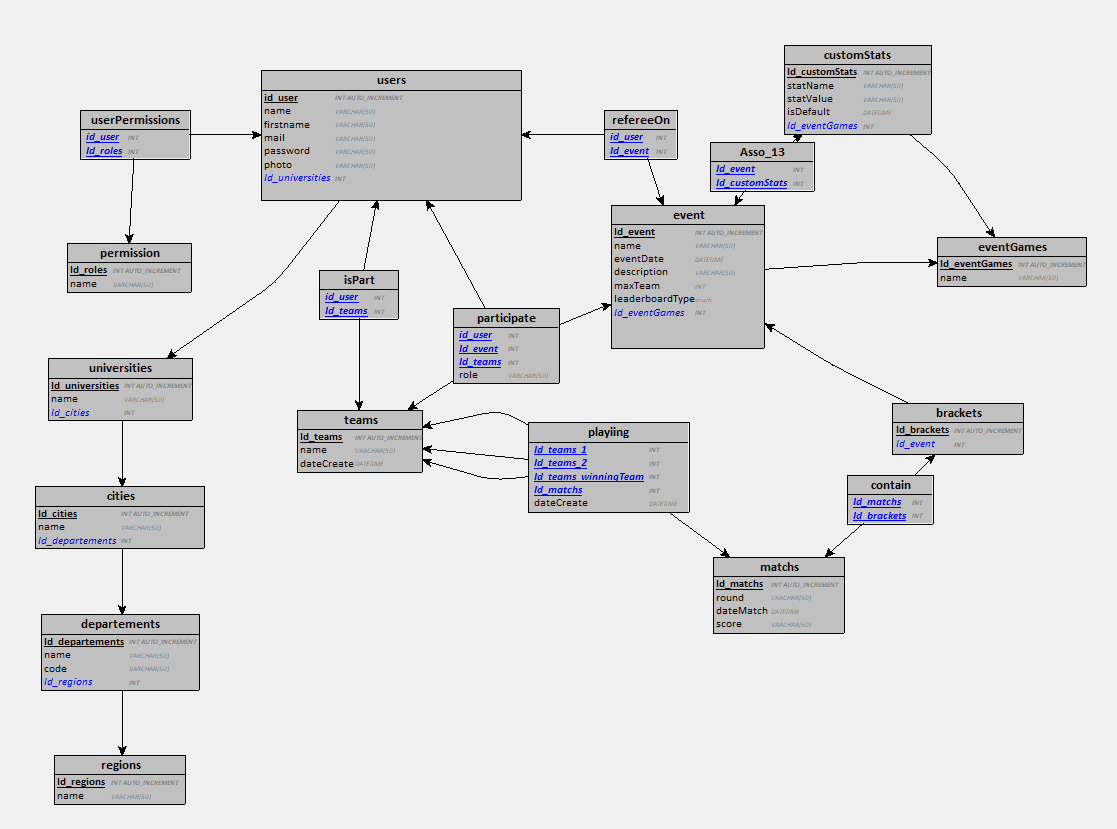

# API Tournois Esport Universités — Endpoints + codes HTTP + payloads

Base URL: `/api`  
Auth: `Authorization: Bearer <JWT>`

Rôles:
- USER
- ORGANIZER
- ADMIN (attribué uniquement en BDD)
- REFEREE (rôle **spécifique à un event**, recommandé via `participate.role` plutôt qu’un rôle global)

Conventions:
- Dates ISO 8601
- Listes: `{ "items": [...], "page": 1, "limit": 20, "total": 123 }`
- Erreur: `{ "error": "CODE", "message": "...", "details": {} }`

---

## 1) Authentification

| Method | Endpoint | Auth | Code | Description | Payload (POST/PATCH) | Response (GET / succès) |
|---|---|---:|---:|---|---|---|
| POST | `/auth/register` | ❌ | 201 | Créer un compte utilisateur standard | `{"firstname":"John","name":"Doe","mail":"john@uni.fr","password":"StrongPass#1","id_universities":3}` | `{"user":{"id_user":1,"firstname":"John","name":"Doe","mail":"john@uni.fr","photo":null,"id_universities":3,"roles":["USER"]},"token":"<jwt>"}` |
| POST | `/auth/login` | ❌ | 200 | Authentifier un utilisateur et retourner un JWT | `{"mail":"john@uni.fr","password":"StrongPass#1"}` | `{"token":"<jwt>","user":{"id_user":1,"firstname":"John","name":"Doe","mail":"john@uni.fr","photo":null,"id_universities":3,"roles":["USER"]}}` |
| POST | `/auth/logout` | ✅ | 204 | Déconnecter l’utilisateur (si blacklist/refresh) | `{}` | *(pas de body)* |

---

## 2) Utilisateurs & Profil

| Method | Endpoint | Auth | Code | Description | Payload (POST/PATCH) | Response (GET / succès) |
|---|---|---:|---:|---|---|---|
| GET | `/users/me` | ✅ | 200 | Récupérer son propre profil | - | `{"user":{"id_user":1,"firstname":"John","name":"Doe","mail":"john@uni.fr","photo":null,"id_universities":3,"roles":["USER","ORGANIZER"]}}` |
| PATCH | `/users/me` | ✅ | 200 | Modifier ses informations personnelles | `{"firstname":"Johnny","photo":"https://..."}` | `{"user":{"id_user":1,"firstname":"Johnny","name":"Doe","mail":"john@uni.fr","photo":"https://...","id_universities":3,"roles":["USER"]}}` |
| PATCH | `/users/me/password` | ✅ | 204 | Changer son mot de passe | `{"oldPassword":"OldPass#1","newPassword":"NewPass#2"}` | *(pas de body)* |
| GET | `/users` | ✅ (ADMIN) | 200 | Lister tous les utilisateurs | - | `{"items":[{"id_user":1,"firstname":"John","name":"Doe","mail":"john@uni.fr","id_universities":3,"roles":["USER"]}],"page":1,"limit":20,"total":1}` |
| GET | `/users/:id_user` | ✅ (ADMIN) | 200 | Récupérer un utilisateur par ID | - | `{"user":{"id_user":42,"firstname":"Alice","name":"Martin","mail":"alice@uni.fr","photo":null,"id_universities":2,"roles":["USER","ORGANIZER"]}}` |
| PATCH | `/users/:id_user` | ✅ (ADMIN) | 200 | Modifier un utilisateur | `{"mail":"alice2@uni.fr","id_universities":5}` | `{"user":{"id_user":42,"firstname":"Alice","name":"Martin","mail":"alice2@uni.fr","photo":null,"id_universities":5,"roles":["USER","ORGANIZER"]}}` |
| DELETE | `/users/:id_user` | ✅ (ADMIN) | 204 | Supprimer un utilisateur | - | *(pas de body)* |

---

## 3) Admin — Gestion des rôles (globaux)

> ⚠️ `ADMIN` ne peut jamais être ajouté via l’API.

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| GET | `/admin/roles` | ✅ (ADMIN) | 200 | Lister tous les rôles existants | - | `{"items":[{"id_roles":1,"name":"USER"},{"id_roles":2,"name":"ORGANIZER"},{"id_roles":3,"name":"ADMIN"}]}` |
| GET | `/admin/users/:id_user/roles` | ✅ (ADMIN) | 200 | Récupérer les rôles d’un utilisateur | - | `{"id_user":42,"roles":["USER","ORGANIZER"]}` |
| POST | `/admin/users/:id_user/roles` | ✅ (ADMIN) | 201 | Ajouter un rôle global (ex: ORGANIZER) | `{"role":"ORGANIZER"}` | `{"id_user":42,"roles":["USER","ORGANIZER"]}` |
| DELETE | `/admin/users/:id_user/roles/:role` | ✅ (ADMIN) | 204 | Retirer un rôle global | - | *(pas de body)* |

### Event — rôle REFEREE (recommandation)
Ta route proposée était: `POST /events/users/:id_user/roles` (manque `:id_event`).
➡️ Je te propose une version REST propre, basée sur `participate.role`:

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| POST | `/organizer/events/:id_event/referees` | ✅ (ORGANIZER owner) | 201 | Nommer un arbitre pour un event | `{"id_user":42}` | `{"id_event":10,"id_user":42,"role":"REFEREE"}` |
| DELETE | `/organizer/events/:id_event/referees/:id_user` | ✅ (ORGANIZER owner) | 204 | Retirer un arbitre de l’event | - | *(pas de body)* |

---

## 4) Universités / Villes / Départements

| Method | Endpoint | Auth | Code | Description | Response (GET) |
|---|---|---:|---:|---|---|
| GET | `/universities` | ✅ | 200 | Lister les universités | `{"items":[{"id_universities":3,"name":"Sorbonne","id_cities":12}],"page":1,"limit":20,"total":1}` |
| GET | `/universities/:id` | ✅ | 200 | Récupérer une université | `{"university":{"id_universities":3,"name":"Sorbonne","id_cities":12}}` |
| GET | `/cities` | ✅ | 200 | Lister les villes | `{"items":[{"id_cities":12,"name":"Paris","id_departements":75}],"page":1,"limit":20,"total":1}` |
| GET | `/departments` | ✅ | 200 | Lister les départements | `{"items":[{"id_departements":75,"name":"Paris","code":"75","id_regions":1}],"page":1,"limit":20,"total":1}` |

---

## 5) Jeux (eventGames)

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| GET | `/games` | ✅ | 200 | Lister les jeux disponibles | - | `{"items":[{"id_eventGames":2,"name":"Valorant"}]}` |
| POST | `/admin/games` | ✅ (ADMIN) | 201 | Créer un nouveau jeu | `{"name":"Rocket League"}` | `{"game":{"id_eventGames":3,"name":"Rocket League"}}` |
| PATCH | `/admin/games/:id_eventGames` | ✅ (ADMIN) | 200 | Modifier un jeu | `{"name":"RL"}` | `{"game":{"id_eventGames":3,"name":"RL"}}` |
| DELETE | `/admin/games/:id_eventGames` | ✅ (ADMIN) | 204 | Supprimer un jeu | - | *(pas de body)* |

---

## 6) Équipes (teams / isPart)

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| GET | `/teams` | ✅ | 200 | Lister les équipes | - | `{"items":[{"id_teams":7,"name":"Sorbonne Blue","dateCreate":"2025-12-01T10:00:00Z"}],"page":1,"limit":20,"total":1}` |
| POST | `/teams` | ✅ | 201 | Créer une équipe | `{"name":"Sorbonne Blue"}` | `{"team":{"id_teams":7,"name":"Sorbonne Blue","dateCreate":"2025-12-01T10:00:00Z"}}` |
| GET | `/teams/:id_teams` | ✅ | 200 | Récupérer une équipe | - | `{"team":{"id_teams":7,"name":"Sorbonne Blue","dateCreate":"2025-12-01T10:00:00Z"}}` |
| PATCH | `/teams/:id_teams` | ✅ | 200 | Modifier une équipe | `{"name":"Sorbonne Blue A"}` | `{"team":{"id_teams":7,"name":"Sorbonne Blue A","dateCreate":"2025-12-01T10:00:00Z"}}` |
| DELETE | `/teams/:id_teams` | ✅ | 204 | Supprimer une équipe | - | *(pas de body)* |
| GET | `/teams/:id_teams/members` | ✅ | 200 | Lister les membres d’une équipe | - | `{"items":[{"id_user":1,"firstname":"John","name":"Doe"}]}` |
| POST | `/teams/:id_teams/members` | ✅ | 201 | Ajouter un membre à l’équipe | `{"id_user":42}` | `{"id_teams":7,"id_user":42}` |
| DELETE | `/teams/:id_teams/members/:id_user` | ✅ | 204 | Retirer un membre de l’équipe | - | *(pas de body)* |
| POST | `/teams/:id_teams/join` | ✅ | 201 | Rejoindre une équipe | `{}` | `{"id_teams":7,"id_user":1}` |
| POST | `/teams/:id_teams/leave` | ✅ | 204 | Quitter une équipe | `{}` | *(pas de body)* |

---

## 7) Events — Utilisateurs

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| GET | `/events` | ✅ | 200 | Lister les événements | - | `{"items":[{"id_event":10,"name":"Tournoi Valorant Inter-UNI","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":16,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}],"page":1,"limit":20,"total":1}` |
| GET | `/events/:id_event` | ✅ | 200 | Récupérer un événement | - | `{"event":{"id_event":10,"name":"Tournoi Valorant Inter-UNI","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":16,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}}` |
| GET | `/events/:id_event/teams` | ✅ | 200 | Lister les équipes inscrites | - | `{"items":[{"id_teams":7,"name":"Sorbonne Blue"}]}` |
| GET | `/events/:id_event/participants` | ✅ | 200 | Lister les participants | - | `{"items":[{"id_user":1,"id_teams":7,"role":"PLAYER"}]}` |
| POST | `/events/:id_event/join` | ✅ | 201 | Participer à un event avec une équipe | `{"id_teams":7,"role":"PLAYER"}` | `{"participation":{"id_user":1,"id_event":10,"id_teams":7,"role":"PLAYER"}}` |
| POST | `/events/:id_event/leave` | ✅ | 204 | Quitter un événement | `{"id_teams":7}` | *(pas de body)* |
| GET | `/events/:id_event/leaderboard` | ✅ | 200 | Récupérer le classement | - | `{"type":"SINGLE_ELIM","rows":[{"rank":1,"team":{"id_teams":7,"name":"Sorbonne Blue"}},{"rank":2,"team":{"id_teams":9,"name":"Dauphine Red"}}]}` |

---

## 8) Events — Organisateur

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| POST | `/organizer/events` | ✅ (ORGANIZER) | 201 | Créer un événement | `{"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":16,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}` | `{"event":{"id_event":10,"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":16,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}}` |
| PATCH | `/organizer/events/:id_event` | ✅ (ORGANIZER) | 200 | Modifier un événement | `{"maxTeam":32}` | `{"event":{"id_event":10,"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":32,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}}` |
| DELETE | `/organizer/events/:id_event` | ✅ (ORGANIZER) | 204 | Supprimer un événement | - | *(pas de body)* |
| GET | `/organizer/events` | ✅ (ORGANIZER) | 200 | Lister ses événements | - | `{"items":[{"id_event":10,"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z"}],"page":1,"limit":20,"total":1}` |
| GET | `/organizer/events/:id_event/participants` | ✅ (ORGANIZER) | 200 | Voir/manager les participants | - | `{"items":[{"id_user":1,"id_teams":7,"role":"PLAYER"}]}` |
| DELETE | `/organizer/events/:id_event/participants/:id_user` | ✅ (ORGANIZER) | 204 | Exclure un participant | - | *(pas de body)* |

---

## 9) Brackets & Matchs

### Lecture

| Method | Endpoint | Auth | Code | Description | Response |
|---|---|---:|---:|---|---|
| GET | `/events/:id_event/brackets` | ✅ | 200 | Lister les brackets d’un event | `{"items":[{"id_brackets":3,"id_event":10}]}` |
| GET | `/brackets/:id_brackets` | ✅ | 200 | Récupérer un bracket | `{"bracket":{"id_brackets":3,"id_event":10}}` |
| GET | `/brackets/:id_brackets/matches` | ✅ | 200 | Lister les matchs d’un bracket | `{"items":[{"id_matchs":22,"round":"QF","dateMatch":"2026-01-12T18:00:00Z","score":"2-1","teams":{"a":{"id_teams":7,"name":"Sorbonne Blue"},"b":{"id_teams":9,"name":"Dauphine Red"}},"winningTeam":7}]}` |
| GET | `/matches/:id_matchs` | ✅ | 200 | Récupérer un match | `{"match":{"id_matchs":22,"round":"QF","dateMatch":"2026-01-12T18:00:00Z","score":"2-1","teams":{"id_teams_1":7,"id_teams_2":9,"id_teams_winningTeam":7}}}` |

### Gestion (organisateur)

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| POST | `/organizer/events/:id_event/brackets` | ✅ (ORGANIZER) | 201 | Créer un bracket | `{}` | `{"bracket":{"id_brackets":3,"id_event":10}}` |
| DELETE | `/organizer/brackets/:id_brackets` | ✅ (ORGANIZER) | 204 | Supprimer un bracket | - | *(pas de body)* |
| POST | `/organizer/brackets/:id_brackets/matches` | ✅ (ORGANIZER) | 201 | Créer un match | `{"round":"QF","dateMatch":"2026-01-12T18:00:00Z","id_teams_1":7,"id_teams_2":9}` | `{"match":{"id_matchs":22,"round":"QF","dateMatch":"2026-01-12T18:00:00Z","score":"","teams":{"id_teams_1":7,"id_teams_2":9,"id_teams_winningTeam":null}}}` |
| PATCH | `/organizer/matches/:id_matchs` | ✅ (ORGANIZER) | 200 | Mettre à jour un match | `{"score":"2-1","winningTeam":7}` | `{"match":{"id_matchs":22,"round":"QF","dateMatch":"2026-01-12T18:00:00Z","score":"2-1","teams":{"id_teams_1":7,"id_teams_2":9,"id_teams_winningTeam":7}}}` |
| DELETE | `/organizer/matches/:id_matchs` | ✅ (ORGANIZER) | 204 | Supprimer un match | - | *(pas de body)* |

---

## 10) Statistiques personnalisées

> Je corrige ta section:  
- `POST /admin/stats` = ADMIN only (stats “catalogue” / permanentes)  
- ORGANIZER associe une stat à un event via `/organizer/events/:id_event/stats`  
- REFEREE modifie la valeur/stat liée à un event (je te donne une route dédiée plus claire)

### Catalogue de stats (ADMIN)

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| POST | `/admin/stats` | ✅ (ADMIN) | 201 | Créer une statistique permanente | `{"statName":"MVP","statValue":"","id_eventGames":2}` | `{"stat":{"id_customStats":1,"statName":"MVP","statValue":"","isDefault":null,"id_eventGames":2}}` |
| PATCH | `/admin/stats/:id_customStats` | ✅ (ADMIN) | 200 | Modifier une statistique permanente | `{"statName":"MVP Player"}` | `{"stat":{"id_customStats":1,"statName":"MVP Player","statValue":"","isDefault":null,"id_eventGames":2}}` |
| DELETE | `/admin/stats/:id_customStats` | ✅ (ADMIN) | 204 | Supprimer une statistique permanente | - | *(pas de body)* |

### Stats d’un event (USER/ORGANIZER)

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| GET | `/events/:id_event/stats` | ✅ | 200 | Lister les stats activées pour l’event | - | `{"items":[{"id_customStats":1,"statName":"MVP","statValue":"","id_eventGames":2}]}` |
| POST | `/organizer/events/:id_event/stats` | ✅ (ORGANIZER) | 201 | Associer une stat à un event | `{"id_customStats":1}` | `{"id_event":10,"id_customStats":1}` |
| DELETE | `/organizer/events/:id_event/stats/:id_customStats` | ✅ (ORGANIZER) | 204 | Retirer une stat d’un event | - | *(pas de body)* |

### Mise à jour par REFEREE (recommandé)
Comme ton MLD ne montre pas où tu stockes la valeur “par match/team/event”, je propose une route qui met à jour `statValue` **si tu le fais au niveau event**, sinon il faudra une table `eventStatValues`.
Pour rester compatible avec ton MLD:

| Method | Endpoint | Auth | Code | Description | Payload | Response |
|---|---|---:|---:|---|---|---|
| PATCH | `/events/:id_event/stats/:id_customStats` | ✅ (REFEREE/ORGANIZER owner) | 200 | Mettre à jour la valeur de la stat pour l’event | `{"statValue":"John Doe"}` | `{"stat":{"id_customStats":1,"statName":"MVP","statValue":"John Doe","id_eventGames":2}}` |

---

## 11) Admin — Supervision globale

| Method | Endpoint | Auth | Code | Description | Response |
|---|---|---:|---:|---|---|
| GET | `/admin/events` | ✅ (ADMIN) | 200 | Lister tous les événements | `{"items":[{"id_event":10,"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z"}],"page":1,"limit":20,"total":1}` |
| GET | `/admin/events/:id_event` | ✅ (ADMIN) | 200 | Récupérer un événement | `{"event":{"id_event":10,"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":16,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}}` |
| PATCH | `/admin/events/:id_event` | ✅ (ADMIN) | 200 | Modifier un événement | `{"maxTeam":32}` | `{"event":{"id_event":10,"name":"Tournoi","eventDate":"2026-01-12T18:00:00Z","description":"...","maxTeam":32,"leaderboardType":"SINGLE_ELIM","id_eventGames":2}}` |
| DELETE | `/admin/events/:id_event` | ✅ (ADMIN) | 204 | Supprimer un événement | *(pas de body)* | *(pas de body)* |
| GET | `/admin/teams` | ✅ (ADMIN) | 200 | Lister toutes les équipes | `{"items":[{"id_teams":7,"name":"Sorbonne Blue","dateCreate":"2025-12-01T10:00:00Z"}],"page":1,"limit":20,"total":1}` |

---

## 12) Middlewares recommandés

- `authRequired` → Vérifie JWT
- `requireRole(...)` → Vérifie rôle global (USER/ORGANIZER/ADMIN)
- `requireEventOwner` → Vérifie ownership event (à implémenter via `createdBy` ou table pivot)
- `requireRefereeOrOwner` → Autorise REFEREE (event) ou ORGANIZER owner
- `validateBody` → Validation payloads

---

## 13) Notes importantes (pour éviter les pièges)

- **Rôle REFEREE**: ne le mets pas dans `userPermissions` (global), mais dans `participate.role` (scopé à un event).
- Ta route `POST /events/users/:id_user/roles` est ambiguë → préfère `/organizer/events/:id_event/referees`.
- Si tu veux stocker des stats **par match** ou **par team**, ajoute une table:
  `eventStatValues(id_event, id_customStats, scopeType, scopeId, value)`.

---
